<a href="https://colab.research.google.com/github/AIhexNICK-MAIL-RU/ML-projects-new/blob/main/Net_ml_hw8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Задание

## Цель: применить на практике базовые ансамблевые методы
Описание задания:
В домашнем задании нужно решить задачу классификации наличия болезни сердца у пациентов. Данные для обучения моделей необходимо загрузить самостоятельно с сайта. Целевая переменная – наличие болезни сердца (HeartDisease), принимает значения 0 или 1 в зависимости от отсутствия или наличия болезни соответственно. (Подробнее о признаках можно прочесть в описании датасета на сайте. Для выполнения работы не обязательно вникать в медицинские показатели.)

# Этапы работы:

# 1 Получите данные и загрузите их в рабочую среду. (Jupyter Notebook или другую)

In [71]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.model_selection import GridSearchCV
# from sklearn.metrics import make_scorer
from sklearn.metrics import r2_score
from sklearn.model_selection import ShuffleSplit

In [72]:
data = pd.read_csv('heart.csv')

In [73]:
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [74]:
data.shape

(918, 12)

In [75]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


# 2 Подготовьте датасет к обучению моделей.

### проверка на наличие уникальных значений переменных для приведения в цифровые

In [76]:
data['ChestPainType'].unique() # можно перевести в цифровые 0, 1, 2, 3

array(['ATA', 'NAP', 'ASY', 'TA'], dtype=object)

In [77]:
data['FastingBS'].unique() # цифровые

array([0, 1])

In [78]:
data['RestingECG'].unique() # можно перевести в цифровые 0, 1, 2

array(['Normal', 'ST', 'LVH'], dtype=object)

In [79]:
data['ExerciseAngina'].unique() # можно перевести в цифровые 0 и 1

array(['N', 'Y'], dtype=object)

In [80]:
data['Oldpeak'].unique() # цифровые

array([ 0. ,  1. ,  1.5,  2. ,  3. ,  4. ,  0.5,  2.5,  5. ,  0.8,  0.7,
        1.4,  2.1,  0.4,  0.2,  1.7,  2.2,  0.1,  1.6,  1.3,  0.3,  1.8,
        2.6, -0.9,  2.8, -2.6, -1.5, -0.1,  0.9,  1.1,  2.4, -1. , -1.1,
       -0.7, -0.8,  3.7,  1.2, -0.5, -2. ,  1.9,  3.5,  0.6,  3.1,  2.3,
        3.4,  3.6,  4.2,  3.2,  5.6,  3.8,  2.9,  6.2,  4.4])

In [81]:
data['ST_Slope'].unique() # можно перевести в цифровые 0, 1, 2

array(['Up', 'Flat', 'Down'], dtype=object)

In [82]:
data['HeartDisease'].unique() # цифровые 0 и 1

array([0, 1])

## a) Категориальные переменные переведите в цифровые значения. Можно использовать pd.get_dummies, preprocessing.LabelEncoder. Старайтесь не использовать для этой задачи циклы.

In [83]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [84]:
data.head(1)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0


In [86]:
# EA = data['ExerciseAngina']
# EA.head()

In [87]:
le.fit(data['ExerciseAngina'])
le.transform(['N', 'Y'])
EA = pd.Series(data=le.transform(data['ExerciseAngina']))
EA.head()

0    0
1    0
2    0
3    1
4    0
dtype: int64

In [88]:
le.fit(data['Sex'])
le.transform(['M', 'F'])
Sx = pd.Series(data=le.transform(data['Sex']))
Sx.head()

0    1
1    0
2    1
3    0
4    1
dtype: int64

In [89]:
le.fit(data['ChestPainType'])
le.transform(['ATA', 'NAP', 'ASY', 'TA'])
CPT = pd.Series(data=le.transform(data['ChestPainType']))
CPT.head()

0    1
1    2
2    1
3    0
4    2
dtype: int64

In [90]:
le.fit(data['RestingECG'])
le.transform(['Normal', 'ST', 'LVH'])
RECG = pd.Series(data=le.transform(data['RestingECG']))
RECG.head()

0    1
1    1
2    2
3    1
4    1
dtype: int64

In [91]:
STS = data['ST_Slope']
le.fit(data['ST_Slope'])
le.transform(['Up', 'Flat', 'Down'])
STS = pd.Series(data=le.transform(data['ST_Slope']))
STS.head()

0    2
1    1
2    2
3    1
4    2
dtype: int64

In [98]:
final_df = pd.concat([data['Age'], Sx, CPT, data['RestingBP'], data['Cholesterol'], data['FastingBS'], RECG, data['MaxHR'], EA, data['Oldpeak'], STS, data['HeartDisease']],axis=1)
final_df.head()

,Age,0,1,RestingBP,Cholesterol,FastingBS,2,MaxHR,3,Oldpeak,4,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0


In [101]:
#selectedColumns = data['Age', 'Sx', 'CPT', 'RestingBP', 'Cholesterol', 'FastingBS', 'RECG', 'MaxHR', 'EA', 'Oldpeak', 'STS', 'HeartDisease']
selectedColumns = data[['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS', 'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope', 'HeartDisease']]
selectedColumns.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [106]:
# selectedColumns = data[[]]
# selectedColumns.head()
X = pd.get_dummies(selectedColumns, columns=['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'], drop_first=True)
X.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,1,1,0,0,1,0,0,0,1
1,49,160,180,0,156,1.0,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.0,0,1,1,0,0,0,1,0,0,1
3,48,138,214,0,108,1.5,1,0,0,0,0,1,0,1,1,0
4,54,150,195,0,122,0.0,0,1,0,1,0,1,0,0,0,1


#### Выводы для себя:
Если говорить про решение задачи без цикла, то открыл для себя 2 способа сделать новый датасет для последующей работы, пока не понятно как работает get_dummies, и насколько верно делать тем или иным способом.
Хотя мне и пока не понятно как решать задачу в цикле.
В первом способе теряются названия и просто нумеруются последовательно начиная с нуля (final_df).

## b) *Постройте 1-2 графика на выбор. Визуализация должна быть основана на исследуемых данных и быть полезной (из графика можно сделать вывод об особенностях датасета/класса/признака).

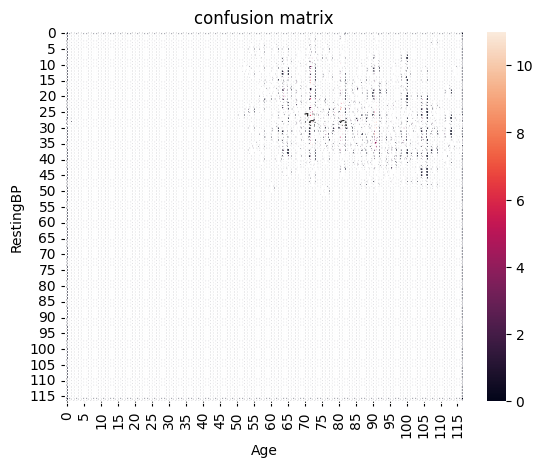

In [109]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(X['Age'], X['RestingBP'])
sns.heatmap(cm, annot=True)

plt.title('confusion matrix')
plt.xlabel('Age')
plt.ylabel('RestingBP');

In [117]:
plt.figure(figsize=(10, 8))

sns.set(font_scale=1.4)

sns.heatmaps(corr_matrix, annot=True, linewidths=.5, cmap='coolwarm') # heatmaps есть только в sns

plt.title('Correlation matrix')

AttributeError: ignored

<Figure size 1000x800 with 0 Axes>

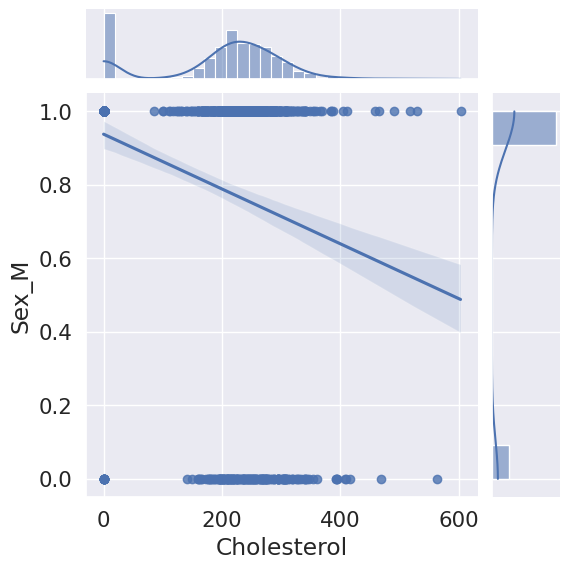

In [121]:
sns.jointplot(x=X['Cholesterol'], y = X['Sex_M'], kind='reg')

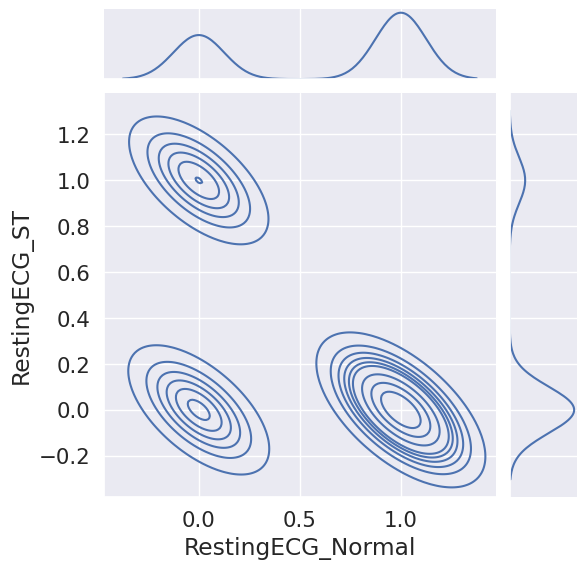

In [123]:
sns.jointplot(x=X['RestingECG_Normal'], y=X['RestingECG_ST'], kind='kde');

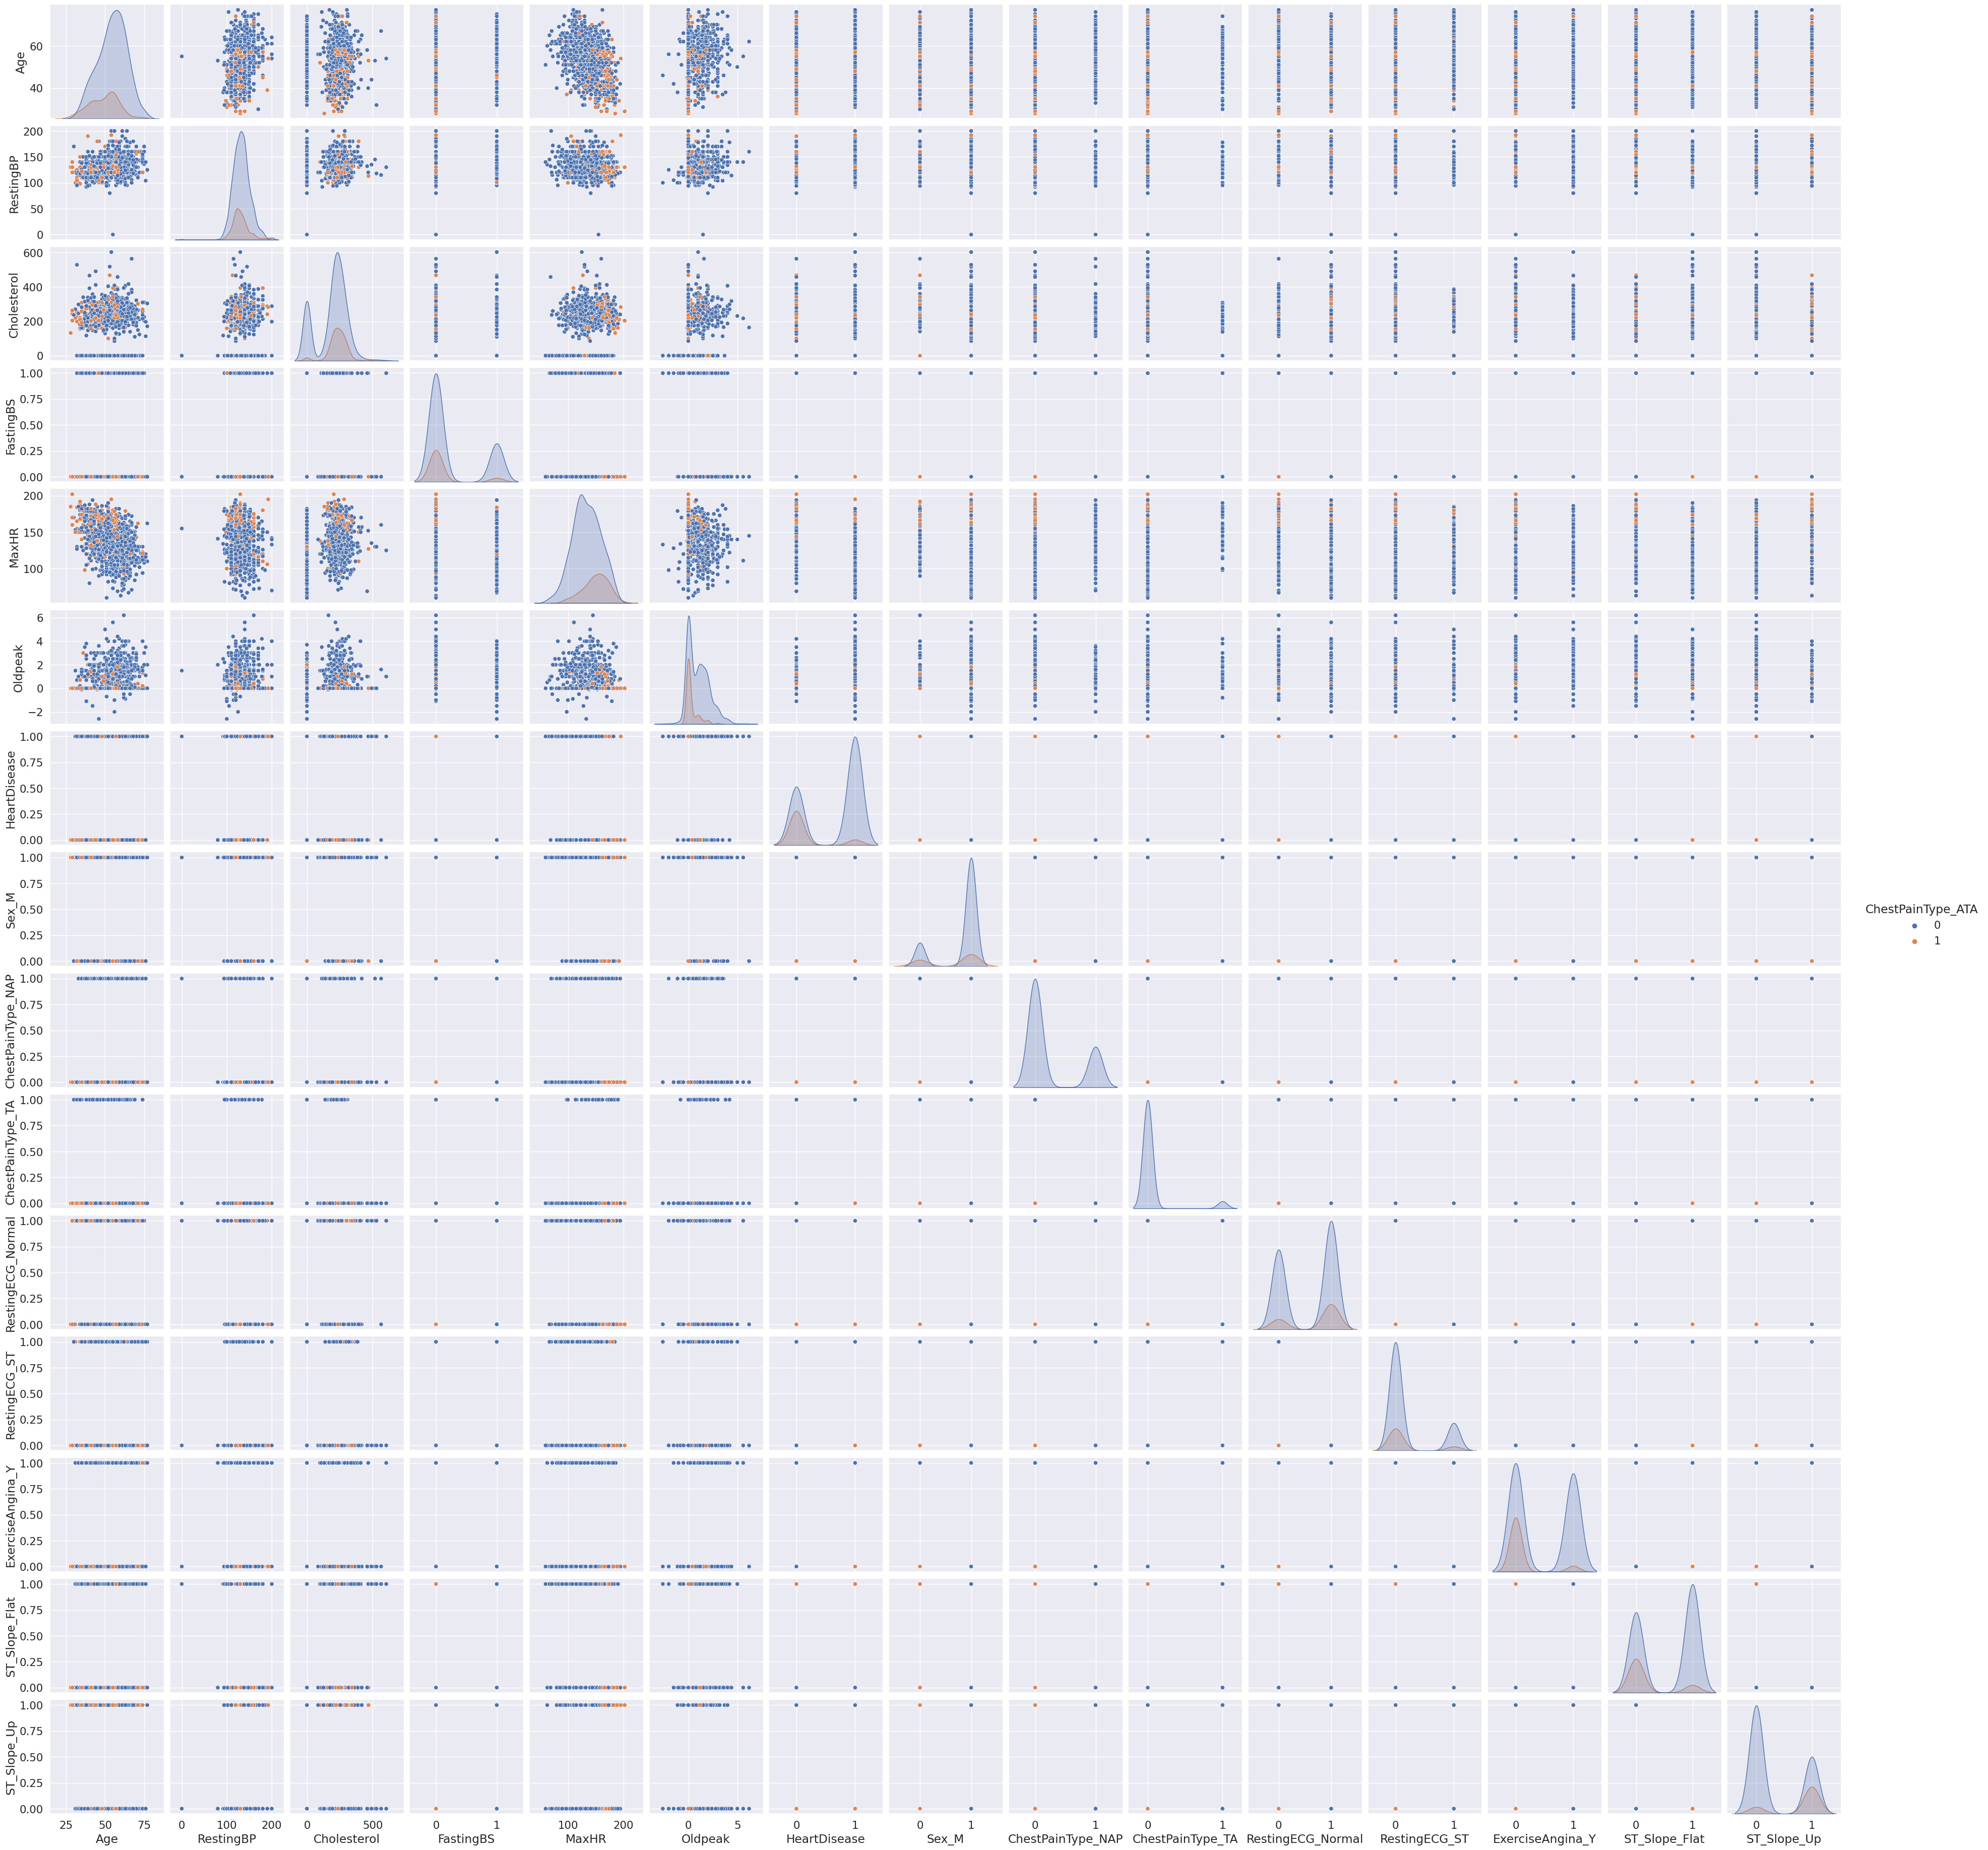

In [125]:
sns.pairplot(X, hue='ChestPainType_ATA', diag_kind="kde");

# 3 Разделите выборку на обучающее и тестовое подмножество. 80% данных оставить на обучающее множество, 20% на тестовое.

In [116]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_test.index

Int64Index([668,  30, 377, 535, 807, 793, 363, 583, 165, 483,
            ...
            265, 478, 333, 787,  97, 211, 745, 584, 878, 451],
           dtype='int64', length=184)

# 4 Обучите дерево решений на обучающем множестве. Используйте следующие модели:

In [126]:
from sklearn.tree import DecisionTreeClassifier

In [127]:
clf = DecisionTreeClassifier(max_depth=2)

## a) tree.DecisionTreeClassifier

In [128]:
clf.fit(X, y)

DecisionTreeClassifier(max_depth=2)

In [129]:
clf.predict(X)

array([52, 52, 52, 52, 54, 52, 52, 54, 52, 52, 52, 58, 52, 52, 52, 54, 52,
       52, 58, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 56, 54, 52,
       52, 52, 58, 52, 52, 52, 54, 54, 52, 52, 52, 58, 52, 52, 52, 52, 52,
       52, 52, 52, 52, 52, 52, 58, 54, 52, 52, 52, 52, 52, 52, 52, 52, 52,
       52, 52, 58, 52, 52, 52, 54, 52, 52, 52, 52, 52, 54, 54, 58, 52, 56,
       58, 58, 52, 52, 54, 52, 52, 52, 52, 52, 58, 52, 52, 56, 52, 58, 52,
       52, 52, 52, 58, 52, 52, 52, 52, 58, 58, 52, 52, 52, 52, 52, 58, 52,
       52, 52, 52, 52, 58, 58, 54, 52, 52, 54, 52, 52, 52, 56, 56, 58, 52,
       52, 52, 54, 52, 52, 52, 52, 52, 56, 52, 52, 52, 52, 54, 52, 52, 52,
       54, 52, 56, 52, 52, 52, 54, 58, 52, 52, 52, 52, 52, 52, 52, 58, 58,
       52, 52, 52, 52, 52, 52, 54, 58, 52, 52, 52, 52, 52, 52, 54, 58, 58,
       52, 52, 52, 52, 52, 52, 52, 52, 58, 52, 52, 52, 58, 52, 52, 52, 52,
       56, 52, 52, 52, 52, 54, 52, 52, 56, 56, 52, 52, 52, 54, 54, 52, 52,
       52, 52, 52, 54, 52

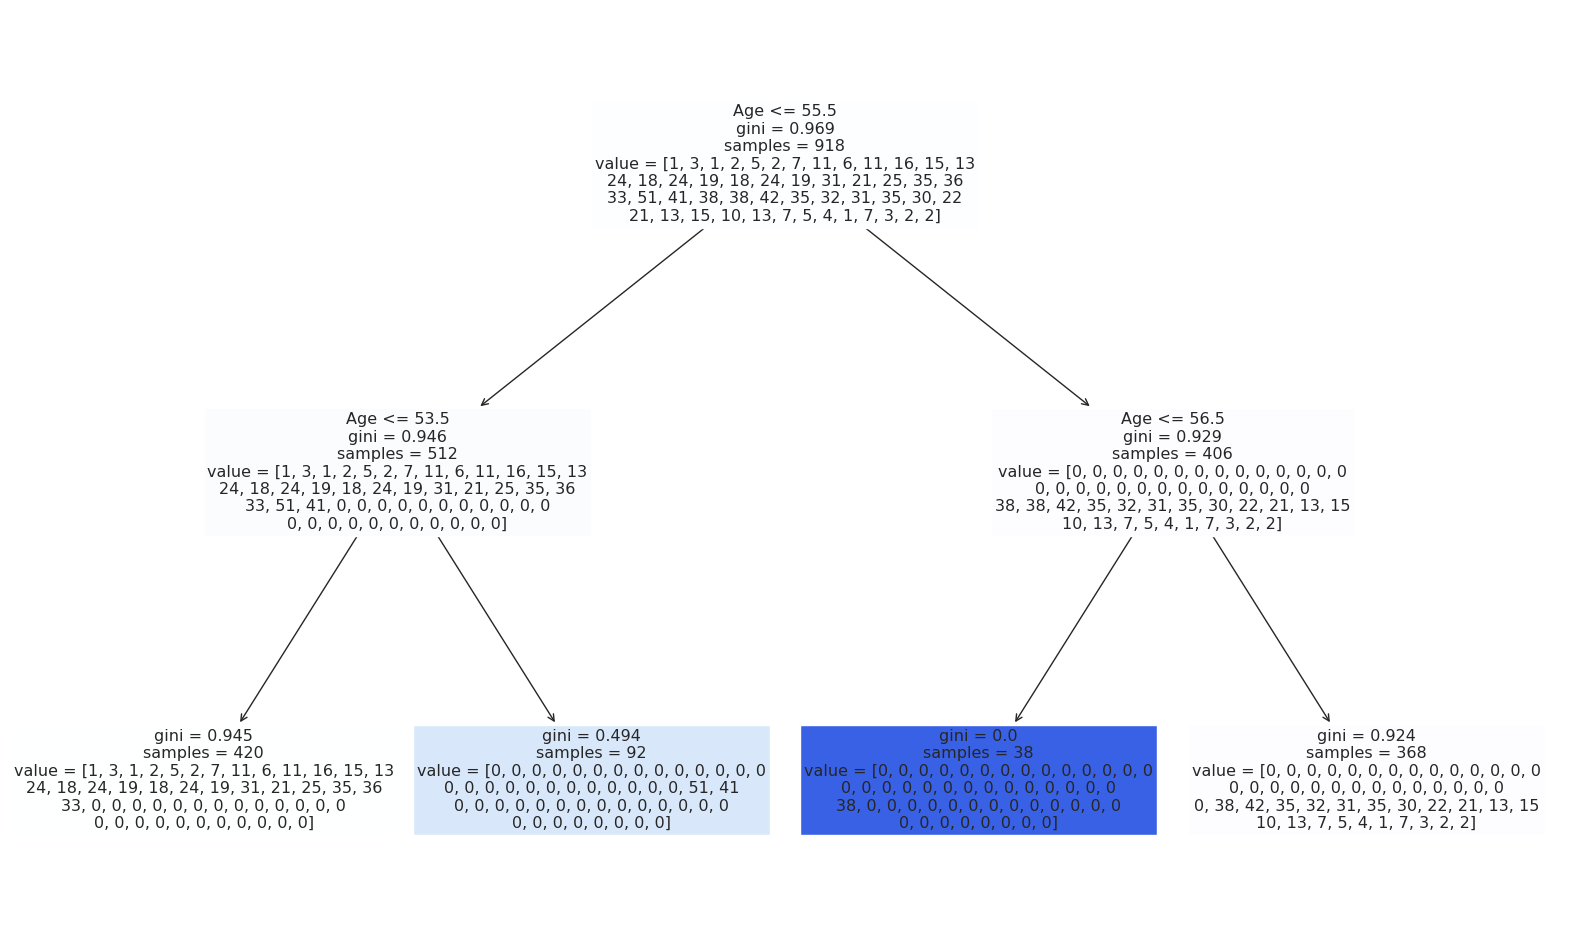

In [130]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 12))
plot_tree(clf, feature_names=X.columns, filled=True);

## b) ensemble.RandomForestClassifier

In [134]:
from sklearn.ensemble import RandomForestClassifier

In [135]:
clf1 = RandomForestClassifier(max_depth=2)

In [137]:
clf1.fit(X, y)

RandomForestClassifier(max_depth=2)

In [ ]:
# Тут нет деревевьев??
# from sklearn.tree import plot_tree

# plt.figure(figsize=(20, 12))
# plot_tree(clf1, feature_names=X.columns, filled=True);

# 5 Для тестового множества сделайте предсказание целевой переменной. Выведите метрики для каждой построенной модели с помощью metrics.classification_report.

In [150]:
print(X_test.shape)

(184, 16)


In [151]:
print(X_train.shape)

(734, 16)


In [146]:
from sklearn.metrics import classification_report

In [159]:
sklearn.metrics.classification_report(y_train, y_test, *, labels=None, target_names=None, sample_weight=None, digits=2, output_dict=False, zero_division='warn')

SyntaxError: ignored

In [156]:
print(classification_report(y_test, y_test))

              precision    recall  f1-score   support

          28       1.00      1.00      1.00         1
          30       1.00      1.00      1.00         1
          32       1.00      1.00      1.00         3
          34       1.00      1.00      1.00         2
          35       1.00      1.00      1.00         2
          37       1.00      1.00      1.00         2
          38       1.00      1.00      1.00         2
          39       1.00      1.00      1.00         6
          40       1.00      1.00      1.00         6
          41       1.00      1.00      1.00         3
          42       1.00      1.00      1.00         1
          43       1.00      1.00      1.00         5
          44       1.00      1.00      1.00         7
          45       1.00      1.00      1.00         3
          46       1.00      1.00      1.00         4
          47       1.00      1.00      1.00         4
          48       1.00      1.00      1.00         7
          49       1.00    

# 6 Выведите важность признаков, полученную после обучения модели из п. 4b в виде столбчатой диаграммы. Отсортируйте важность по убыванию.

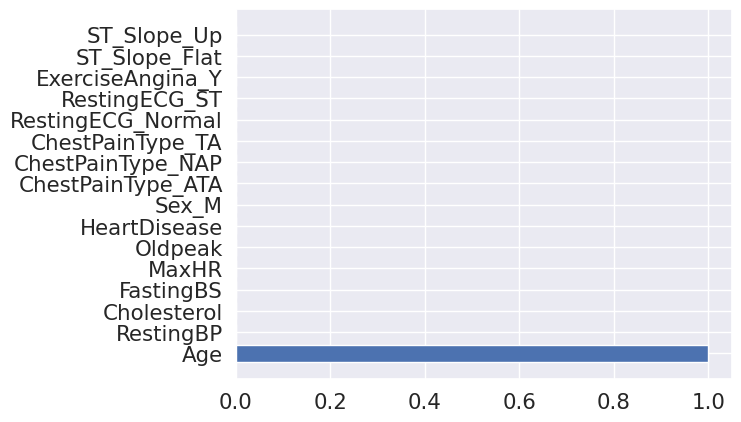

In [160]:
clf = DecisionTreeClassifier(max_depth=3)
clf.fit(X, y)

plt.barh(np.arange(len(clf.feature_importances_)), clf.feature_importances_)
plt.yticks(np.arange(len(X.columns)), X.columns)
plt.show()

# 7 Обучите бэггинг над моделью из п. 4a. Используйте ensemble.BaggingClassifier.

In [161]:
from sklearn.ensemble import  BaggingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

In [162]:
dt = DecisionTreeRegressor(random_state=10)
dt.fit(X_train, y_train)
dt.score(X_train, y_train)

1.0

In [163]:
dt.score(X_test, y_test)

0.9997099862148883

In [164]:
bagging = BaggingRegressor(DecisionTreeRegressor(),
                           n_estimators=10,
                           max_samples=0.5,
                           max_features=0.5,
                           random_state=10)

In [165]:
bagging.fit(X_train, y_train)

BaggingRegressor(estimator=DecisionTreeRegressor(), max_features=0.5,
                 max_samples=0.5, random_state=10)

In [166]:
bagging.score(X_train, y_train)

0.8951985594300508

In [167]:
bagging.score(X_test, y_test)

0.779837083540746

In [168]:
kn = KNeighborsRegressor()
kn.fit(X_train, y_train)
kn.score(X_train, y_train)

0.8373326922586158

In [169]:
kn.score(X_test, y_test)

0.6722194597358415

In [170]:
bagging = BaggingRegressor(KNeighborsRegressor(),
                           n_estimators=100,
                           max_samples=0.5,
                           max_features=0.5,
                           random_state=10)

In [171]:
bagging.fit(X_train, y_train)

BaggingRegressor(estimator=KNeighborsRegressor(), max_features=0.5,
                 max_samples=0.5, n_estimators=100, random_state=10)

In [172]:
bagging.score(X_train, y_train)

0.7433755221747729

In [173]:
bagging.score(X_test, y_test)

0.6384197732205683

## a) Повторите п. 5

In [174]:
print(classification_report(y_test, y_test))

              precision    recall  f1-score   support

          28       1.00      1.00      1.00         1
          30       1.00      1.00      1.00         1
          32       1.00      1.00      1.00         3
          34       1.00      1.00      1.00         2
          35       1.00      1.00      1.00         2
          37       1.00      1.00      1.00         2
          38       1.00      1.00      1.00         2
          39       1.00      1.00      1.00         6
          40       1.00      1.00      1.00         6
          41       1.00      1.00      1.00         3
          42       1.00      1.00      1.00         1
          43       1.00      1.00      1.00         5
          44       1.00      1.00      1.00         7
          45       1.00      1.00      1.00         3
          46       1.00      1.00      1.00         4
          47       1.00      1.00      1.00         4
          48       1.00      1.00      1.00         7
          49       1.00    

# 8 Обучите стекинг трех моделей: из п. 4a, п. 4b и svm.LinearSVC. Используйте ensemble.StackingClassifier.

In [175]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import RidgeCV

In [176]:
# Создаем стэккинг и обучаем его на наших данных

Regressor = StackingRegressor(
    [
        ('LinearRegression', LinearRegression()),
        ('KNeighborsRegressor', KNeighborsRegressor()),
        ('DecisionTree', DecisionTreeRegressor())
    ], RidgeCV())

In [177]:
Regressor.fit(X_train, y_train)

StackingRegressor(estimators=[('LinearRegression', LinearRegression()),
                              ('KNeighborsRegressor', KNeighborsRegressor()),
                              ('DecisionTree', DecisionTreeRegressor())],
                  final_estimator=RidgeCV())

In [178]:
print(f'Score on train  {Regressor.score(X_train, y_train)}')
print(f'Score on test  {Regressor.score(X_test, y_test)}')

Score on train  0.9999999999431733
Score on test  0.9999999975581834


In [179]:
for i in Regressor.named_estimators:
    print(f'Score on train  with model {i} {Regressor.named_estimators_[i].score(X_train, y_train)}')
    print(f'Score on test  with model {i} {Regressor.named_estimators_[i].score(X_test, y_test)}')

Score on train  with model LinearRegression 1.0
Score on test  with model LinearRegression 1.0
Score on train  with model KNeighborsRegressor 0.8373326922586158
Score on test  with model KNeighborsRegressor 0.6722194597358415
Score on train  with model DecisionTree 1.0
Score on test  with model DecisionTree 0.9997099862148883


## a) Повторите п. 5

In [180]:
print(classification_report(y_test, y_test))

              precision    recall  f1-score   support

          28       1.00      1.00      1.00         1
          30       1.00      1.00      1.00         1
          32       1.00      1.00      1.00         3
          34       1.00      1.00      1.00         2
          35       1.00      1.00      1.00         2
          37       1.00      1.00      1.00         2
          38       1.00      1.00      1.00         2
          39       1.00      1.00      1.00         6
          40       1.00      1.00      1.00         6
          41       1.00      1.00      1.00         3
          42       1.00      1.00      1.00         1
          43       1.00      1.00      1.00         5
          44       1.00      1.00      1.00         7
          45       1.00      1.00      1.00         3
          46       1.00      1.00      1.00         4
          47       1.00      1.00      1.00         4
          48       1.00      1.00      1.00         7
          49       1.00    

# 9 Сформулируйте выводы по проделанной работе.

## a) Сравните метрики построенных моделей.

## b) Напишите свое мнение, какая модель наилучшая и почему.



In [ ]:
# По-моему ensemble.StackingClassifier справился с задачей лучше всех